<a href="https://colab.research.google.com/github/DeisyData/BIT_IA_Bootcamp/blob/main/S9_C4_FuzzyLogic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 7.3 MB/s eta 0:00:00


# Librerías

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Caso Nivel de Lealtad

Una cadena de supermercados desea clasificar a sus clientes según su **nivel de lealtad** , utilizando los datos de **frecuencia de compra** y el **gasto promedio por visita**.



Paso 1. Variables de Entrada

* Gasto Promedio por Visita (COP)=> Gasto: {Bajo, medio, alto}. U : [0,800.000]
* Frecuencia de compra (visitas/mes)=> Frecuencia: {Baja, media, alta} U: [0, 30]

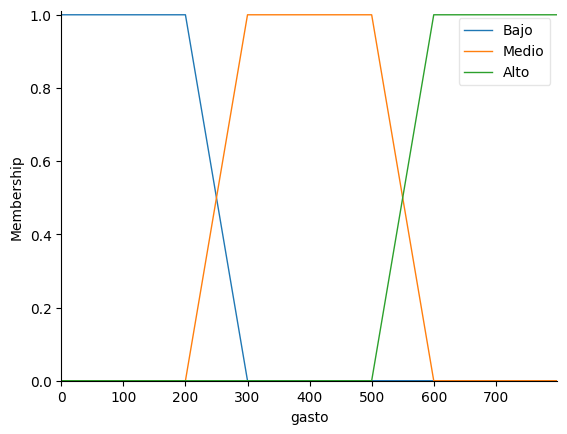

In [7]:
gasto = ctrl.Antecedent(np.arange(0,800,1),'gasto')
gasto['Bajo'] = fuzz.trapmf(gasto.universe,[0,0,200,300]) # Trap: trapezoidal mf: membershio funtion
gasto['Medio'] = fuzz.trapmf(gasto.universe,[200,300,500,600])
gasto['Alto'] = fuzz.trapmf(gasto.universe,[500,600,800,800])
gasto.view()

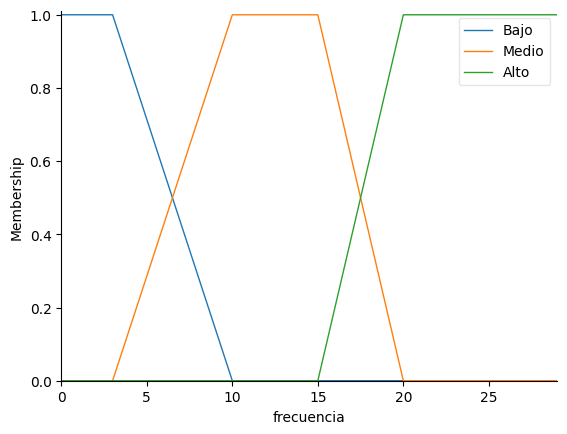

In [9]:
frecuencia = ctrl.Antecedent(np.arange(0,30,1),'frecuencia')
frecuencia['Bajo'] = fuzz.trapmf(frecuencia.universe,[0,0,3,10]) # Trap: trapezoidal mf: membershio funtion
frecuencia['Medio'] = fuzz.trapmf(frecuencia.universe,[3,10,15,20])
frecuencia['Alto'] = fuzz.trapmf(frecuencia.universe,[15,20,30,30])
frecuencia.view()